<a href="https://colab.research.google.com/github/ryohei98/LeaderReport/blob/master/Graduation_Paper_Github_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Driveをマウントする

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive

MyDrive


##適応度地形の生成

In [ ]:
# -*- coding: utf-8 -*-
'''
Created on Wed Jun 13 15:42:13 2018
Updated on Tue May 21 08:49:00 2019
@author: Maciej Workiewicz
The code has been tested on Python 2.7 and 3.6 and higher
'''

print('''
----------------------------------------------------
Running Module 1: NK landscape creation and analysis
----------------------------------------------------
''')

# COMMENTS

# =============================================================================
# This code generates NK landscapes for a specific interaction matrix (IM) and 
# number of interactions between the decision variables (K). It has been created
# for NK landscapes with N=6, but it can be adapted to for other values of N.
# You can choose the type of an interaction matrix by setting variable
# "which_imatrix" to:
#     1 - for a random interaction matrix (IM)
#     2 - for a modular (block-diagonal) IM
#     3 - for a nearly modular IM
#     4 - for a diagonal IM
#     5 - highly influential IM (Baumann & Siggelkow 2013)
#     6 - highly dependent IM (Baumann & Siggelkow 2013)
#     7 - Local IM (Rivkin and Siggelkow, 2007)
# 
# For the random IM the user can also set K from 0 to N-1 to tune the number of
# interactions.
# =============================================================================


# *** IMPORTED PACKAGES ***
import numpy as np
import itertools
import os # new
from time import time
import matplotlib.pyplot as plt
import random


start = time()  # starts the clock used to measure the execution speed

# *** MODEL INPUTS ****************************************************

# NK landscape parameters -----------------------------------------
N = 6  # number of detailed decisions per lower level landscape   |
i = 1000  # we will generate 1000 NK landscapes to begin with     |
# -----------------------------------------------------------------

# You can change the following variables:
which_imatrix = 1  # defines the type of an interaction matrix
                   # choose 1 for random, 2 for modular, 3 for nearly modular,
                   # 4 for diagonal, 5 for highly influential, and
                   # 6 for highly dependent, 7 local (see below)
K = 5  # only has an effect when you choose the random interaction matrix (1)
       # set to 2 for other interaction matrices

file_specific = '_t_100_ver_' #ファイルにつける特異的な名前


# *** GENERATING INTERACTION MATRICES ***************************************

def imatrix_rand(D,K):
    '''
    グループ分け可能
    ・部門数＝D
    ・グループに含まれる要素数＝P（以下に定義）
    '''
    P = N/D
    #zeros()_縦N個横N個の配列を全要素０の状態で生成
    Int_matrix_rand = np.zeros((N, N))

    #arrange(start,stop,kousa,dtype)_0~NでPの公差を持つ等差数列を配列の形で生成
    for aa1 in np.arange(0,N,P,dtype = int):
      Ln = aa1 + P
      for aa2 in np.arange(aa1,Ln,1,dtype = int):

        #range(N)_0~Nの連番を配列で生成する
        Indexes_1 = list(range(N))
        for i in np.arange(aa1,Ln,1,dtype = int):

          #remove(i)_同じ値を検索し、最初の要素を削除する
          Indexes_1.remove(i)  # remove selves

        #numpy.random.shuffle()_配列の要素をシャッフルする（in-place)  
        np.random.shuffle(Indexes_1)
        for i in np.arange(aa1,Ln,1,dtype = int):
          #append()_配列に新しい要素を追加する
          Indexes_1.append(i)

          #[-(K+1):最後]という意味
        Chosen_ones = Indexes_1[-(K+1):]  # this takes the last K+1 indexes
        for aa3 in Chosen_ones:
          Int_matrix_rand[aa2, aa3] = 1  # we turn on the interactions with K other variables
    return(Int_matrix_rand)



#==============================================================================
# Below are the other three types of interaction matrices.
# You can edit those if you want to check other petterns of interactions.
#==============================================================================

if which_imatrix == 2:  # MODULAR
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 1, 1, 1]
                 ])

elif which_imatrix == 3:  # NEARLY MODULAR
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 0, 1],
                 [0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 1, 1, 1]
                 ])
elif which_imatrix == 4:  # DIAGONAL
    K = 2  # set to average value and updated code below to poke three random holes
    Int_matrix4 = \
        np.array([
                 [1, 0, 0, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 1, 0, 0],
                 [1, 1, 1, 1, 1, 0],
                 [1, 1, 1, 1, 1, 1]
                 ])
    
elif which_imatrix == 5:  # HIGHLY INFLUENTIAL Baumann & Siggelkow 2013
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [1, 1, 0, 1, 0, 0],
                 [1, 1, 0, 0, 1, 0],
                 [1, 1, 0, 0, 0, 1]
                 ])

elif which_imatrix == 6:  # HIGHLY DEPENDENT Baumann & Siggelkow 2013
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1, 1],
                 [1, 1, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 1]
                 ])
elif which_imatrix == 7:  # LOCAL Rivkin and Siggelkow, 2007
    K = 2  # set to the average value
    Int_matrix = \
        np.array([
                 [1, 1, 0, 0, 0, 1],
                 [1, 1, 1, 0, 0, 0],
                 [0, 1, 1, 1, 0, 0],
                 [0, 0, 1, 1, 1, 0],
                 [0, 0, 0, 1, 1, 1],
                 [1, 0, 0, 0, 1, 1]
                 ])

# *** NK GENERATING FUNCTIONS ***********************************************
def calc_fit(NK_land_, inter_m, Current_position, Power_key_):
    '''
    Takes the landscape and a given combination and returns a vector of fitness
    values for the vector of the N decision variables.
    '''
    Fit_vector = np.zeros(N)
    for ad1 in np.arange(N):
        Fit_vector[ad1] = NK_land_[np.sum(Current_position * inter_m[ad1]
                                          * Power_key_), ad1]
    return(Fit_vector)


def comb_and_values(NK_land_, Power_key_, inter_m):
    '''
    Calculates values for all combinations on the landscape. The resulting
    array contains:
    - the first columns indexed from 0 to N-1 are for each of the combinations
    - columns indexed from N to 2*N-1 are for the fit value (vector) of those combinations
    - the column indexed 2N is for the total fit (average of the entire vector)
    - column indexed 2N+1 is a dummy, with 1 indicating a local peak
    - the last column is a dummy, with 1 indicating the global peak
    '''
    Comb_and_value = np.zeros((2**N, N*2+3))  # to capture the results
    c1 = 0  # starting counter for location
    for c2 in itertools.product(range(2), repeat=N):
        # this takes time so be carefull with landscapes of bigger size
        Combination1 = np.array(c2)  # taking each combination
        fit_1 = calc_fit(NK_land_, inter_m, Combination1, Power_key_)
        Comb_and_value[c1, :N] = Combination1  # combination and values
        Comb_and_value[c1, N:2*N] = fit_1
        Comb_and_value[c1, 2*N] = np.mean(fit_1)
        c1 = c1 + 1
    for c3 in np.arange(2**N):  # now let's see if it is a local peak
        loc_p = 1  # first, assume it is
        for c4 in np.arange(N):  # check the local neighbourhood
            new_comb = Comb_and_value[c3, :N].copy().astype(int)
            new_comb[c4] = abs(new_comb[c4] - 1)
            if ((Comb_and_value[c3, 2*N] <
                 Comb_and_value[np.sum(new_comb*Power_key_), 2*N])):
                loc_p = 0  # if smaller than the neighbour, then it is not peak
        Comb_and_value[c3, 2*N+1] = loc_p
    max_ind = np.argmax(Comb_and_value[:, 2*N])
    Comb_and_value[max_ind, 2*N+2] = 1
    return(Comb_and_value)


# *** GENERATING THE NK LANDSCAPES ******************************************
Power_key = np.power(2, np.arange(N - 1, -1, -1))  # used to find addresses on the landscape
Landscape_data = np.zeros((i, 2**N, N*2+3))  # we prepare an array to receive the data

for i_1 in np.arange(i):
    '''
    Now we create the landscapes
    '''
    if which_imatrix==1:
        Int_matrix = imatrix_rand().astype(int)
    elif which_imatrix==4:  # diagonal
        '''
        The code below serves to poke three holes in the diagonal IM so that
        K=2. It is a little bit cumbersome but does the job  :-)
        Note that it only works with N=6
        '''
        Int_matrix = Int_matrix4.copy()
        id_change = random.sample(range(15), 3)
        for index in id_change:
            if index == 0:
                Int_matrix[1,0] = 0
            elif index == 1:
                Int_matrix[2,0] = 0
            elif index == 2:
                Int_matrix[2,1] = 0
            elif index == 3:
                Int_matrix[3,0] = 0
            elif index == 4:
                Int_matrix[3,1] = 0
            elif index == 5:
                Int_matrix[3,2] = 0
            elif index == 6:
                Int_matrix[4,0] = 0
            elif index == 7:
                Int_matrix[4,1] = 0
            elif index == 8:
                Int_matrix[4,2] = 0
            elif index == 9:
                Int_matrix[4,3] = 0
            elif index == 10:
                Int_matrix[5,0] = 0
            elif index == 11:
                Int_matrix[5,1] = 0
            elif index == 12:
                Int_matrix[5,2] = 0
            elif index == 13:
                Int_matrix[5,3] = 0
            elif index == 14:
                Int_matrix[5,4] = 0
    
    NK_land = np.random.rand(2**N, N)  # this is a table of random U(0,1) numbers
    # Now it is time to survey the topography of our NK landscape
    Landscape_data[i_1] = comb_and_values(NK_land, Power_key, Int_matrix)


# *** CALCULATING SUMMARY STATISTICS ****************************************
number_of_peaks = np.zeros(i)
max_values = np.zeros(i)
min_values = np.zeros(i)

for i_2 in np.arange(i):
    number_of_peaks[i_2] = np.sum(Landscape_data[i_2, :, 2*N+1])
    max_values[i_2] = np.max(Landscape_data[i_2, :, 2*N])
    min_values[i_2] = np.min(Landscape_data[i_2, :, 2*N])

# Let's print some summary statistics of our sample of NK landscapes
print('Summary statistics for IMatrix: ' + str(which_imatrix) + ' K=' + str(K))
print('average number of peaks: ' + str(np.mean(number_of_peaks)))
print('maximum number of peaks: ' + str(np.max(number_of_peaks)))
print('minimum number of peaks: ' + str(np.min(number_of_peaks)))
print('average maximum value: ' + str(np.mean(max_values)))
print('average minimum value: ' + str(np.mean(min_values)))

# plot histogram of the number of local peaks in our sample
plt.figure(1, facecolor='white', figsize=(8, 6), dpi=150)  # for screens with
#          higher resolution change dpi to 150 or 200. For normal use 75.
plt.hist(number_of_peaks, bins=20, range=(1, 20), color='dodgerblue', edgecolor='black') # adjust if necessary
plt.title('Distribution of the number of peaks', size=12)
plt.xlabel('number of peaks', size=10)
plt.ylabel('frequency', size=10)


# *** SAVING THE LANDSCAPES AS A BINARY FILE FOR FUTURE RETRIEVAL ************

#==============================================================================
# If you are saving files on a Mac, change the double back-slash \\ into a 
# single slash /
#==============================================================================

file_name = os.path.expanduser("~")  # we will save it in your home folder
if not os.path.exists(file_name + '\\NK_workshop\\'):
    os.makedirs(file_name + '\\NK_workshop\\')
np.save(file_name + '\\NK_workshop\\NK_land_type_' + str(which_imatrix) +
        '_K_' + str(K) + '_i_' + str(i) + '_' + str(file_specific) + '.npy', Landscape_data)

elapsed_time = time() - start
print('time: ' + str("%.2f" % elapsed_time) + ' sec')

# END OF LINE

##強化学習を追加してクラス化したモデル

###クラスの読み込み

In [24]:

import numpy as np
import matplotlib.pyplot as plt 

from keras.models import Sequential
from keras.layers import Dense, ReLU
from keras.optimizers import RMSprop

optimizer = RMSprop()

class Var_set:
  def __init__(self, N, K, Mt, Kex, coord):
    #意思決定の数
    self.N = int(N)
    #相互依存レベル
    self.K = int(K)
    #組織（Agent)の部門分け
    self.Mt = int(Mt)
    #部門外部的相互依存レベル
    self.Kex = int(Kex)
    #グループ間の相互関係
    #0 = decentralized, 1= sequential, 2= proposal
    self.coord = int(coord)

    #プロパティを名前と中に入っているものを表示
    for key, value in self.__dict__.items():
     print(key, ':', value)

  #一部門ごとに割り当てられている意思決定数を返す関数
  def get_Nt(self):
    #一部門の意思決定数
    return int(self.N / self.Mt)

class Environment:
  def __init__(self, N, landscape):
    #何枚目の適応度地形を使用するか
    self.i = 0
    #意思決定の個数
    self.N = N
    #上でつくった適応度地形
    self.landscape = landscape
    #2進数→10進数の変換用配列
    self.converter = np.power(2, np.arange(N-1, -1, -1))
    #適応度地形ごとの最高点・最低点を入れておく
    self.reset()
    #プロパティを名前と中に入っているものを表示
    for key, value in self.__dict__.items():
     print(key, ':', value)
        
  def reset(self):
    self.max_fit = np.max(self.landscape[self.i, :, 2*self.N])
    self.min_fit = np.min(self.landscape[self.i, :, 2*self.N])
    # self.max_fit=1
    # self.min_fit=0

  def step(self):
    self.i += 1
    self.reset()

  def get_contr_norm(self, decimal):
    return (self.landscape[self.i, decimal, 2*self.N] - self.min_fit) / (self.max_fit - self.min_fit)

  def get_norm_from_comb(self, comb):
    decimal = np.sum(comb * self.converter)
    return (self.landscape[self.i, decimal, 2*self.N] - self.min_fit) / (self.max_fit - self.min_fit)

  def get_future_norm_from_comb(self, comb):
    norm = self.get_norm_from_comb(comb)
    norm += np.random.normal(0,0.08)
    return norm

class Agent:
  def __init__(self,var_set, environment, T_star = 5, lamb = 0.5, Nut = 0.1):
    self.var_set = var_set
    self.environment = environment
    self.comb = np.random.binomial(1, 0.5, var_set.N)
    self.contr_norm = self.environment.get_norm_from_comb( self.comb)
    self.rec_norm = [0]
    self.rec_norm[0] = self.contr_norm 
    self.rec_average_norm =[]
    self.rec_delta_Vt =[]
    self.T_star = T_star
    self.lamb = lamb
    self.Nut = Nut
    self.prob_feasible_options = self.create_prob_feasible_options()  
    for key, value in self.__dict__.items():
     print(key, ':', value)

  def create_prob_feasible_options(self):
    Nt = self.var_set.get_Nt()
    Mt = self.var_set.Mt
    num_feasible_options = int( np.power(2,Nt))
    prob_feasible_options = np.zeros((int(Mt),int(num_feasible_options)))
    init_prob = 1 / num_feasible_options
    for a1 in range(Mt):
      for aa1 in range(num_feasible_options):
        prob_feasible_options[a1][aa1] = init_prob
    return prob_feasible_options   

  def get_comb_divided_decimal(self):
    Nt = self.var_set.get_Nt()
    Mt = self.var_set.Mt

    comb_divided_decimal = [0] * Mt
    for a2 in range(Mt):
      element_bin = self.comb[a2*Nt:a2*Nt+Nt]
      element_bin_str = "".join(map(str,element_bin))
      print("element_bin_str:" + str(element_bin_str))
      print("element_bin:" + str(element_bin))
      element_decimal = int(element_bin_str,2)
      print("element_decimal:" + str(element_decimal))
      comb_divided_decimal[a2] = element_decimal
    
    print("comb_divided_decimal:" + str(comb_divided_decimal))
    print("self.comb:"+ str(self.comb))
    return comb_divided_decimal
  
  def local_search(self):
    Nt = self.var_set.get_Nt()
    Mt = self.var_set.Mt
    # previous_comb_divided_decimal = self.get_comb_divided_decimal(self.comb)
    if self.var_set.coord != 0:
      comb_alpha = self.comb
      comb_beta = self.comb
      comb_current = self.comb

    num_feasible_option = np.power(2,Nt)

    for a3 in range(Mt):
      bin_choice = self.get_new_bin_choice(a3)
      if self.var_set.coord == 0:
        print("self.comb[a3*Nt:(a3*Nt)+Nt]:"+str(self.comb[a3*Nt:(a3*Nt)+Nt]))
        self.comb[a3*Nt:(a3*Nt)+Nt] = bin_choice
      elif self.var_set.coord == 1: #sequential
        comb_beta[a3*Nt:(a3*Nt)+Nt] = bin_choice
        current_norm = self.environment.get_future_norm_from_comb(comb_current)
        beta_norm = self.environment.get_future_norm_from_comb(comb_beta)
        if current_norm >= beta_norm:
          comb_beta[a3*Nt:(a3*Nt)+Nt] = comb_current[a3*Nt:(a3*Nt)+Nt]
        else:
          comb_current[a3*Nt:(a3*Nt)+Nt] = comb_beta[a3*Nt:(a3*Nt)+Nt]
        self.comb[a3*Nt:(a3*Nt)+Nt] = comb_beta[a3*Nt:(a3*Nt)+Nt]
      else: #proposal
        comb_beta[a3*Nt:(a3*Nt)+Nt] = bin_choice 
        bin_choice = self.get_new_bin_choice(a3)
        comb_alpha[a3*Nt:(a3*Nt)+Nt] = bin_choice

    if self.var_set.coord == 2:
      current_norm = self.environment.get_future_norm_from_comb(comb_current)
      beta_norm = self.environment.get_future_norm_from_comb(comb_beta)
      alpha_norm = self.environment.get_future_norm_from_comb(comb_alpha)
      if beta_norm >= current_norm:
        self.comb = comb_current
      if alpha_norm >= current_norm:
        self.comb = comb_current
      else:
        self.comb = comb_current

    self.contr_norm = self.environment.get_norm_from_comb(self.comb)
    self.rec_norm.append(self.contr_norm)
    print("self.comb:"+str(self.comb))

    print("train()の引数:" + str(self.get_comb_divided_decimal()))
    self.train(self.get_comb_divided_decimal())

  def train(self, new_comb_divided_decimal):
    for a4 in range(self.var_set.Mt):
      # previous_decimal = previous_comb_divided_decimal[a4]
      picked_option = new_comb_divided_decimal[a4]
      prob_feasible_options = self.prob_feasible_options[a4]
      tau_t = self.get_tau_t()

      for feasible_option in range(len(prob_feasible_options)):
        if feasible_option == picked_option:
          if tau_t:
            prob_feasible_options[picked_option] = prob_feasible_options[picked_option] + self.lamb * (1- prob_feasible_options[picked_option] ) 
          else:
            prob_feasible_options[picked_option] = prob_feasible_options[picked_option] - (self.lamb * prob_feasible_options[picked_option]) 

        else:
          if tau_t:
            prob_feasible_options[feasible_option] = prob_feasible_options[feasible_option] - (self.lamb * prob_feasible_options[feasible_option]) 
          else:
            prob_feasible_options[feasible_option] = prob_feasible_options[feasible_option] + self.lamb * ((prob_feasible_options[picked_option] *prob_feasible_options[feasible_option])/(1-prob_feasible_options[picked_option]))

        if prob_feasible_options[feasible_option] < 0.001:
          prob_feasible_options[feasible_option] = 0.001

      sum = np.sum(prob_feasible_options)
      print("sum:"+str(sum))
      self.prob_feasible_options[a4] = prob_feasible_options / sum

    self.rec_delta_Vt.append(self.get_delta_Vt())
    self.rec_average_norm.append(self.get_average_norm())

    print("prob_feasible_options:"+str(prob_feasible_options))

  def get_new_bin_choice(self,a4):
    Nt = self.var_set.get_Nt()
    num_feasible_option = np.power(2,Nt)
    choice = np.random.choice(range(num_feasible_option), 1, p= self.prob_feasible_options[a4])
    print("choice:%d"%choice)
    imperfect_bin_choice = format(int(choice),'b')
    bin_choice = list(imperfect_bin_choice.zfill(Nt))
    return bin_choice

  def get_average_norm(self):
    scope_end = len(self.rec_norm)
    scope_start = scope_end - self.T_star
    norm_scoped = self.rec_norm[scope_start:scope_end]
    average_norm = np.sum(self.rec_norm)/np.count_nonzero(self.rec_norm)
    return average_norm

  def get_delta_Vt(self):
    average_norm = self.get_average_norm()
    print("average_norm:"+str(average_norm))
    current_norm = self.environment.get_norm_from_comb(self.comb)
    print("current_norm:"+str(current_norm))
    delta_Vt = (current_norm - average_norm)/average_norm
    print("delta_Vt:" + str(delta_Vt))
    return delta_Vt

  def get_tau_t(self):
    delta_Vt = self.get_delta_Vt()
    if delta_Vt >= self.Nut:
      tau_t = True
    else :
      tau_t = False
    return tau_t

class Admin_brain:
  def __init__(self, n_state, n_mid, n_action, gamma=0.9, r=0.99):
    self.eps = 1.0  # ε
    self.gamma = gamma  # 割引率
    self.r = r  # εの減衰率

    model = Sequential()
    model.add(Dense(n_mid, input_shape=(n_state,)))
    model.add(ReLU()) 
    model.add(Dense(n_mid))
    model.add(ReLU()) 
    model.add(Dense(n_action))
    model.compile(loss="mse", optimizer=optimizer)
    self.model = model

  def train(self, states, next_states, action, reward, terminal):
    q = self.model.predict(states)  
    next_q = self.model.predict(next_states)
    t = np.copy(q)
    if terminal:
      t[:, action] = reward  #  エピソード終了時の正解は、報酬のみ
    else:
      t[:, action] = reward + self.gamma*np.max(next_q, axis=1)
    self.model.train_on_batch(states, t)

  def get_action(self, states):
    q = self.model.predict(states)
    if np.random.rand() < self.eps:
      action = np.random.randint(q.shape[1], size=q.shape[0])
    else:
      action = np.argmax(q, axis=1)
    if self.eps > 0.1:  # εの下限
      self.eps *= self.r
    return action

# class Admin:
#   def __init__():


###Test


N : 12
K : 3
Mt : 3
Kex : 0
coord : 1
i : 1
N : 12
landscape : [[[0.         0.         0.         ... 0.46096308 0.         0.        ]
  [0.         0.         0.         ... 0.4264397  0.         0.        ]
  [0.         0.         0.         ... 0.50713303 0.         0.        ]
  ...
  [1.         1.         1.         ... 0.50046327 0.         0.        ]
  [1.         1.         1.         ... 0.60986114 0.         0.        ]
  [1.         1.         1.         ... 0.5207073  0.         0.        ]]

 [[0.         0.         0.         ... 0.36361311 0.         0.        ]
  [0.         0.         0.         ... 0.33786686 0.         0.        ]
  [0.         0.         0.         ... 0.42270784 0.         0.        ]
  ...
  [1.         1.         1.         ... 0.54523696 0.         0.        ]
  [1.         1.         1.         ... 0.58601576 0.         0.        ]
  [1.         1.         1.         ... 0.47612578 0.         0.        ]]

 [[0.         0.         0.      

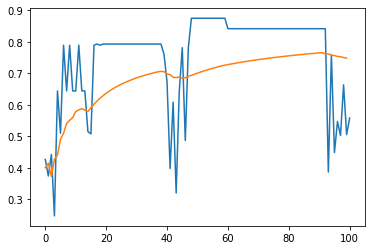

In [31]:
import matplotlib.pyplot as plt

N = 12  #要素数
K = 3
i = 1000  # 期数
t = 100   #一期あたりの回数
coord = 0
file_specific = '_t_100_ver_' #ファイルにつける特異的な名前



Mt = 3
Kex = 0

KG_matrix = \
  np.array([
            [2,5,6,7],
            [3,3,4,5],
            [4,2,3,4],
            [6,1,2,3]
            ])
  
for GG in [0,1,2,3]:
  for KK in [1,2,3]:
    G = KG_matrix[GG,0]
    K = KG_matrix[GG,KK]
    file_name ="/content/drive/My Drive"
    NK_landscape = np.load(file_name + '/NK_workshop/NK_land_type_1' + '_D_' + str(G) + '_K_' + str(K) + '_i_' + str(i) + '.npy')

    var_set = Var_set(N, K, Mt, Kex, coord) 
    environment = Environment(1, NK_landscape)
    agent = Agent(var_set, environment)
    rec_norm_all = np.zeros((i,t))

    for i1 in range(i):
      for t1 in range(t):
        agent.local_search()
      environment.step()
      rec_norm_all[i1] = agent.rec_norm

    x = range(t)
    y = agent.rec_norm

    plt.plot(y)
    plt.plot(agent.rec_average_norm)

###実行



In [ ]:
import numpy as np
from os.path import expanduser  # new
import matplotlib.pyplot as plt
import csv
from google.colab import drive
import os
import random

N = 12  #要素数  
i = 1000  # 期数
t = 100   #一期あたりの回数
D = 4   #部門数/ D=0のときcentralized
P = int(N/D) #部門ごとの意思決定数
file_specific = '_t_100_ver_' #ファイルにつける特異的な名前
H = 1 #垂直的階層数(1-3)


# *** 1. LOAD THE NK LANDSCAPE FILE *****************************************

KD_matrix = \
  np.array([
            [2,5,6,7],
            [3,3,4,5],
            [4,2,3,4],
            [6,1,2,3]
            ])

D_array_original = select_divisor(N) #約数を格納するリスト
Landscape_data = np.zeros((12,len(D_array_original)+6))


# ***************************************************************************

for DD in [0,1,2,3]:
  for KK in [1,2,3]:
    D = KD_matrix[DD,0]
    K = KD_matrix[DD,KK]
    D_original = D
    P_original = int(N/D)

    file_name ="/content/drive/My Drive"
    NK_landscape = np.load(file_name + '/NK_workshop/NK_land_type_1'  + '_D_' + str(D) +
                          '_K_' + str(K) + '_i_' + str(i) + '.npy')
    


    '''
    以下で必要な準備

    '''

    D_prob_array = D_prob_make(D_array_original)

    # *** 2. DECENTRALIZED LOCAL SEARCH *****************************************
    Output3 = np.zeros((i, t))
    for i1 in np.arange(i):
        combination = np.random.binomial(1, 0.5, N)# 50%の確率の二項分布に従ったときの成功数をサンプル5つ分：N個の要素の配列/つまり、ランダムな1と0のN個の要素の配列
        row = np.sum(combination*power_key)#10進数に直している
        fitness = NK_landscape[i1, row, 2*N]#i1枚目のランドスケープのrow行2*N列を現在のfitnessとする
        max_fit = np.max(NK_landscape[i1, :, 2*N])# use for normalization of perf
        min_fit = np.min(NK_landscape[i1, :, 2*N])# ditto
        fitness_norm = (fitness - min_fit)/(max_fit - min_fit)
        #Dを入れる
        #ロングジャンプ
        if(0.9 < np.random.rand()):
          D= np.random.choice(D_array_original)
          
        #prob_arrayの確率に従ってランダム選択
        else:
          D= np.random.choice(D_array_original, p = D_prob_array)     

        for t1 in np.arange(t):
            
            Output3[i1, t1] = fitness_norm
            row = np.sum(combination*power_key)

            if D != 0:  #　部門別に行われるサーチ
              if H <= 2: #階層数が2の場合
                '''
               ここに下でテストしているものが代入される
                '''


                combination = final_combs_D
                row = int(np.sum(combination*power_key))
                new_fitness = NK_landscape[i1, row, 2*N]  # 最終的な貢献 # final fitness
                if new_fitness > fitness:
                    fitness = new_fitness.copy()


              if H = 1: #階層数が1の場合
                 P = int(N/D) # 部門ごとの意思決定数
                comb_D = np.hsplit(combination, D) # 組み合わせを部門ごとに分け、配列の形でそれぞれを保存
                new_fits = np.zeros(P+1) #各貢献度を記録しておく配列
                new_fits[P] = fitness #今の貢献度を代入する
                final_combs_D = np.zeros(N) #最終結果を入れる配列を用意
                for i2 in np.arange(D): 
                  s = int(i2*P)
                  new_comb_D = comb_D[i2].copy() # 部門ごとの組み合わせを取得
                  new_combs = np.zeros((D,P+1,N)) #組み合わせの全体を保存するための配列
                  new_combs[i2,P,:] = combination.copy() #現在の組み合わせを保存する
                # 以下、変更後の判定
                  for i3 in np.arange(P):
                    new_comb_D[i3]= abs(new_comb_D[i3] - 1) # 0→1、1→0へ/ abs()は絶対値を求める関数
                    new_combs[i2,i3,:] = combination.copy() #元の組み合わせを代入
                    new_combs[i2,i3,s:s+P] = new_comb_D #変えた組み合わせを代入
                    row2 = int(np.sum(new_combs[i2,i3,:]*power_key))#変えた組み合わせを2進数に
                    new_fits[i3] = NK_landscape[i1, row2, 2*N]  # 変更先の貢献度の平均
                    new_comb_D = comb_D[i2].copy()
                  final_combs_D[s:s+P] = new_combs[i2,np.argmax(new_fits),s:s+P]
                combination = final_combs_D
                row = int(np.sum(combination*power_key))
                new_fitness = NK_landscape[i1, row, 2*N]  # 最終的な貢献 # final fitness
                if new_fitness > fitness:
                    fitness = new_fitness.copy()


            elif D == 0:  # さもなければ、部門に分けない意思決定
                new_combination = combination.copy()
                choice_var = np.random.randint(N)
                new_combination[choice_var] = abs(new_combination[choice_var] - 1)
                row = np.sum(new_combination*power_key)
                new_fitness = NK_landscape[i1, row, 2*N]
                if new_fitness > fitness:
                    combination = new_combination.copy()
                    fitness = new_fitness.copy()
            
              
        fitness_norm = (fitness - min_fit)/(max_fit - min_fit)

        #normを記録する
        D_norm_rec[i1+1, D_array_original.index(D)] = fitness_norm

        #過去のnormの平均を計算し、累乗することで調整をかける
        for i2 in np.arange(0, len(D_array_original), 1, dtype = int):
          norm_ave[i2] = (np.sum(D_norm_rec[0:, i2])  / np.count_nonzero(D_norm_rec[0:, i2])) ** learn_strength


        #調整後のnormの値をもとに、Dの選択確率を求める
        for i3 in np.arange(0, len(D_array_original), 1, dtype = int):
          D_prob_array[i3] = norm_ave[i3] / np.sum(norm_ave)
          D_prob_rec[i1,i3] = D_prob_array[i3]

        if final_max_fitness < fitness_norm:
          final_max_fitness = fitness_norm

    # *** 3. PLOT ***************************************************************

    # plt.figure(1,facecolor='white', figsize=(8, 6), dpi=75)  # for screens with
    # # higher resolution change dpi to 150 or 200. For normal use 75.
    # plt.ylim(0, 1)
    # plt.xlim(1,1000)
    # plt.legend(loc=4,prop={'size':10})
    # plt.title('Results of local search', size=12)
    # plt.xlabel('time periods', size=12)
    # plt.ylabel('fitness', size=12)

    ave_norm = np.sum(D_norm_rec) / 1000

    Landscape_data[count_cycle,0] = D_original
    Landscape_data[count_cycle,1] = K
    Landscape_data[count_cycle,2] = K-P_original+1
    Landscape_data[count_cycle,3] = final_max_fitness
    Landscape_data[count_cycle,4] = ave_norm
    Landscape_data[count_cycle,5] = D_array_original[np.argmax(D_prob_array)]
    count_figure = 6
    for iii3 in range(len(D_array_original)):
      Landscape_data[count_cycle, count_figure] = D_prob_array[iii3]
      count_figure += 1

    count_cycle += 1

    print("LandscapeのD:" + str(D_original))
    print("Kの値：" + str(K))
    print("最大のNorm:"+str(final_max_fitness))
    print("normの平均："+str(ave_norm))
    print('--Dの選択確率------')
    for iii2 in range(len(D_array_original)):
      print("D=" + str(D_array_original[iii2])+ "の選択確率：" + str(D_prob_array[iii2])) 
    print("Dの選択確率が最大の際のＤ："+ str(D_array_original[np.argmax(D_prob_array)]))
    print("--*****************************************-----")

    plt.figure(facecolor='white', figsize=(8, 6), dpi=150)  # for screens with
    # higher resolution change dpi to 150 or 200. For normal use 75.
    for iii4 in range(len(D_array_original)):
      if iii4 == 0:
        plt.plot(D_prob_rec[0:,iii4], label = 'cen')
      else:
       plt.plot(D_prob_rec[0:,iii4], label = str(D_array_original[iii4]))
    plt.ylim(0, 0.7)
    plt.xlim(0,1000)
    plt.legend(loc=4,prop={'size':10})
    plt.title('Transition of selection probability of Mt (G='+str(D_original) +', K='+ str(K)+ ', Kex=' +str(K-P_original+1)+')', size=12)
    plt.xlabel('Time Periods', size=12)
    plt.ylabel('Selection Probability of Mt', size=12)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.savefig(file_name + '/NK_workshop/_D_' + str(D_original) +
                          '_K_' + str(K) + '_i_' + str(i)+'_'+str(file_specific)+'.jpg', format='jpg')
    if not os.path.exists(file_name + '/NK_workshop/'):
      os.makedirs(file_name + '/NK_workshop/')
    np.savetxt(file_name + '/NK_workshop/_D_'+str(D)+'_Kex_'+str(K-P_original+1)+'_norm_rec_'+str(file_specific)+'.csv',D_norm_rec,delimiter=",")
    print(file_name + '/NK_workshop/result_for_figure'+str(file_specific)+'.csv')
    


if not os.path.exists(file_name + '/NK_workshop/'):
    os.makedirs(file_name + '/NK_workshop/')
np.savetxt(file_name + '/NK_workshop/result_for_figure'+str(file_specific)+'.csv',Landscape_data,delimiter=",")
print(file_name + '/NK_workshop/result_for_figure'+str(file_specific)+'.csv')

    # END OF LINE
